## Network Analysis

**Useful Links**

* [networkx tutorial](https://networkx.org/documentation/stable/tutorial.html)
* Georgiev, P. (2014). [NetworkX: 
Network Analysis with Python](https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf)
* Kapoor, A. (2018). [Social Network Analysis in Python](https://www.datacamp.com/community/tutorials/social-network-analysis-python)
* Platt, E. (2019). [Network Science with Python and NetworkX Quick Start Guide](https://github.com/elplatt/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).
* Wikipedia. (2021). [Graph representations](https://en.wikipedia.org/wiki/Template:Graph_representations).

## Importing libraries

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

pd.options.display.max_columns = 100

# Lesson 1

## Basic operations in `networkx`

We'll start by building a network of some of the students in our class. We'll create some artificial relationships and add some attributes to our nodes and edges.

### Adding nodes and edges

The basic pattern of creating networks in `networkx` involves starting with an empty version of a specific graph type and adding nodes and edges. These are toy examples to show the basic functionality. We'll introduce alternative functions for working with real world data in our next lecture. 

In [194]:
# Start with an empty graph object called g
g = nx.Graph()

In [195]:
# Add a node
g.add_node('Stefani')

In [196]:
# See what comes back
g.nodes()

NodeView(('Stefani',))

In [197]:
# Add an edge
g.add_edge('Stefani','Elys')

In [198]:
# Inspect nodes
g.nodes()

NodeView(('Stefani', 'Elys'))

In [199]:
# Inspect edges
g.edges()

EdgeView([('Stefani', 'Elys')])

In [200]:
# Add a few edges
g.add_edges_from([
    ('Stefani','Sarah'),
    ('Stefani','Amanda'),
    ('Stefani','Allison'),
    ('Sarah','Elys'),
    ('Sarah','Allison'),
    ('Allison','Elys'),
    ('Allison','Tony'),
    ('Sarah','Christina'),
    ('Stefani','Tony'),
    ('Stefani','Vinay'),
    ('Stefani','Kobe'),
    ('Stefani','Shiro'),
    ('Stefani','Madeline'),
    ('Stefani','Maggie'),
    ('Stefani','Michael')
])

In [201]:
# Inspect nodes
g.nodes()

NodeView(('Stefani', 'Elys', 'Sarah', 'Amanda', 'Allison', 'Tony', 'Christina', 'Vinay', 'Kobe', 'Shiro', 'Madeline', 'Maggie', 'Michael'))

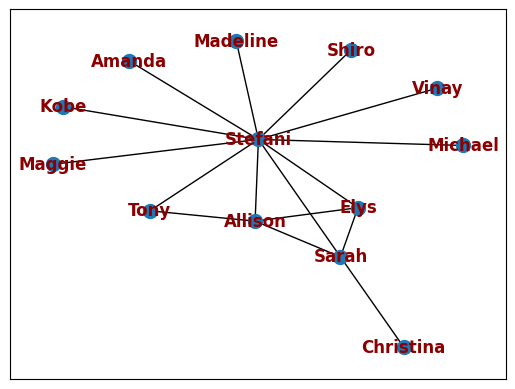

In [202]:
# Basic visualization showing the class network
nx.draw_networkx(g,font_color='darkred',font_weight='bold', node_size=100)
plt.show()

### <span style="color:red">Exercise</span>

Add more edges to the class network based on other relationships you may know.

In [203]:
# Add a few edges
g.add_edges_from([
    ('Stefani','Ryan'),
    ('Stefani','Alex'),
    ('Ryan','Alex'),
    ('Ryan','Chloe'),
    ('Ryan','Shawn'),
    ('Ryan','Ruby'),
    ('Ryan','Cory'),
    ('Ryan','Megan'),
    ('Ryan','Anna'),
    ('Chloe','Shawn'),
    ('Chloe','Ruby'),
    ('Chloe','Cory'),
    ('Chloe','Megan'),
    ('Chloe','Anna')
])

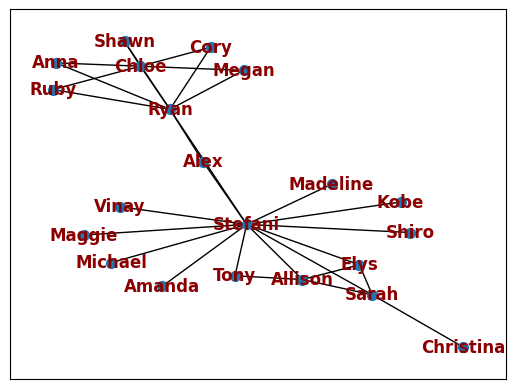

In [204]:
# Basic visualization showing the class network
nx.draw_networkx(g,font_color='darkred',font_weight='bold', node_size=50)
plt.show()

### Graph methods

Now we'll check the number of nodes and edges.

In [205]:
# Count the number of nodes in the network
g.number_of_nodes()

21

In [206]:
# Count the number of edges in the network
g.number_of_edges()

30

### Checking for nodes and edges

Is a node in the network?

In [207]:
# Check the network for a node named "Diana"
g.has_node('Diana')

False

Is an edge in the network?

In [208]:
# Check the network for an edge between "Matt" and "Nandi"
g.has_edge('Matt','Nandi')

False

### Neighbors

Neighbors are the nodes that are connected to node n (i.e., the two vertices are adjacent). The graph object in Python is similar to a dictionary, which means you can use accessor notation like you would when you pull out elements in a list with a node name to retrieve its neighbors.

In [209]:
# Who are Sarah's neighbors in the network?
g['Ryan']

AtlasView({'Stefani': {}, 'Alex': {}, 'Chloe': {}, 'Shawn': {}, 'Ruby': {}, 'Cory': {}, 'Megan': {}, 'Anna': {}})

In [210]:
# You can also use the neighbors method
list(g.neighbors('Ryan'))

['Stefani', 'Alex', 'Chloe', 'Shawn', 'Ruby', 'Cory', 'Megan', 'Anna']

In [211]:
list(g.neighbors('Allison'))

['Stefani', 'Sarah', 'Elys', 'Tony']

### Node and edge properties

We can add additional meta-data to the nodes and edges in the network.

In [212]:
# Add node attribute called "role" for Stefani
g.nodes['Stefani']['role'] = 'Faculty'

In [213]:
# Access a node's attribute
g.nodes['Stefani']

{'role': 'Faculty'}

In [214]:
# Retrieve all nodes' attributes
g.nodes().data()

NodeDataView({'Stefani': {'role': 'Faculty'}, 'Elys': {}, 'Sarah': {}, 'Amanda': {}, 'Allison': {}, 'Tony': {}, 'Christina': {}, 'Vinay': {}, 'Kobe': {}, 'Shiro': {}, 'Madeline': {}, 'Maggie': {}, 'Michael': {}, 'Ryan': {}, 'Alex': {}, 'Chloe': {}, 'Shawn': {}, 'Ruby': {}, 'Cory': {}, 'Megan': {}, 'Anna': {}})

In [215]:
g.nodes(data=True)

NodeDataView({'Stefani': {'role': 'Faculty'}, 'Elys': {}, 'Sarah': {}, 'Amanda': {}, 'Allison': {}, 'Tony': {}, 'Christina': {}, 'Vinay': {}, 'Kobe': {}, 'Shiro': {}, 'Madeline': {}, 'Maggie': {}, 'Michael': {}, 'Ryan': {}, 'Alex': {}, 'Chloe': {}, 'Shawn': {}, 'Ruby': {}, 'Cory': {}, 'Megan': {}, 'Anna': {}})

We can similarly add meta-data to the edges.

In [216]:
# Add three relations
g['Stefani']['Sarah']['relation'] = 'Advising'
g['Stefani']['Elys']['relation'] = 'Advising'
g['Stefani']['Allison']['relation'] = 'Advising'

In [217]:
# Add another kind of meta-data called 'years'
g['Stefani']['Sarah']['years'] = 1
g['Stefani']['Elys']['years'] = 1
g['Stefani']['Allison']['years'] = 0

We can add a lot of meta data at once with a `[(node1,node2,dict)]` format where the `dict` contains the labels and values of the meta-data.

In [218]:
g.add_edges_from([
    ('Sarah','Elys',{'relation':'friend','years':1}),
    ('Sarah','Allison',{'relation':'labmate','years':0}),
    ('Allison','Elys',{'relation':'labmate','years':0}),
    ('Allison','Tony',{'relation':'cohort','years':0}),
    ('Sarah','Christina',{'relation':'friend','years':1}),
    ('Stefani','Tony',{'relation':'teaching','years':3}),
    ('Stefani','Vinay',{'relation':'teaching','years':2}),
    ('Stefani','Kobe',{'relation':'teaching','years':1}),
    ('Stefani','Shiro',{'relation':'teaching','years':1}),
    ('Stefani','Madeline',{'relation':'teaching','years':1}),
    ('Stefani','Maggie',{'relation':'teaching','years':1}),
    ('Stefani','Michael',{'relation':'codingclub','years':2}),
    ('Stefani','Amanda',{'relation':'teaching','years':2})
])

In [219]:
# Access edge data
g.edges().data()

EdgeDataView([('Stefani', 'Elys', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Sarah', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Amanda', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Allison', {'relation': 'Advising', 'years': 0}), ('Stefani', 'Tony', {'relation': 'teaching', 'years': 3}), ('Stefani', 'Vinay', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Kobe', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Shiro', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Madeline', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Maggie', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Michael', {'relation': 'codingclub', 'years': 2}), ('Stefani', 'Ryan', {}), ('Stefani', 'Alex', {}), ('Elys', 'Sarah', {'relation': 'friend', 'years': 1}), ('Elys', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Christina', {'relation': 'friend', 'years': 1}), ('Allison', 'Tony', {'relation': 'co

In [220]:
g.edges(data=True)

EdgeDataView([('Stefani', 'Elys', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Sarah', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Amanda', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Allison', {'relation': 'Advising', 'years': 0}), ('Stefani', 'Tony', {'relation': 'teaching', 'years': 3}), ('Stefani', 'Vinay', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Kobe', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Shiro', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Madeline', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Maggie', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Michael', {'relation': 'codingclub', 'years': 2}), ('Stefani', 'Ryan', {}), ('Stefani', 'Alex', {}), ('Elys', 'Sarah', {'relation': 'friend', 'years': 1}), ('Elys', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Christina', {'relation': 'friend', 'years': 1}), ('Allison', 'Tony', {'relation': 'co

In [221]:
g.edges(data=True)

EdgeDataView([('Stefani', 'Elys', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Sarah', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Amanda', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Allison', {'relation': 'Advising', 'years': 0}), ('Stefani', 'Tony', {'relation': 'teaching', 'years': 3}), ('Stefani', 'Vinay', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Kobe', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Shiro', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Madeline', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Maggie', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Michael', {'relation': 'codingclub', 'years': 2}), ('Stefani', 'Ryan', {}), ('Stefani', 'Alex', {}), ('Elys', 'Sarah', {'relation': 'friend', 'years': 1}), ('Elys', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Christina', {'relation': 'friend', 'years': 1}), ('Allison', 'Tony', {'relation': 'co

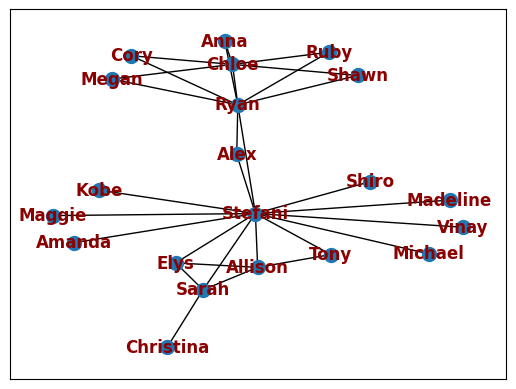

In [222]:
# Basic visualization - when edge properties change, width argument will throw error
nx.draw_networkx(
    g,
    font_color='darkred',
    font_weight='bold',
    node_size=100,
)
plt.show()

### <span style="color:red">Exercise</span>
Add some more metadata to the nodes and/or edges in the network.

In [223]:
g.add_edges_from([
    ('Stefani','Ryan',{'relation':'teaching','years':1}),
    ('Stefani','Alex',{'relation':'teaching','years':1}),
    ('Ryan','Alex',{'relation':'friend','years':1}),
    ('Ryan','Chloe',{'relation':'friend','years':3}),
    ('Ryan','Shawn',{'relation':'friend','years':1}),
    ('Ryan','Ruby',{'relation':'friend','years':1}),
    ('Ryan','Anna',{'relation':'friend','years':1}),
    ('Ryan','Cory',{'relation':'friend','years':1}),
    ('Ryan','Megan',{'relation':'friend','years':1}),
    ('Chloe','Shawn',{'relation':'teaching','years':8}),
    ('Chloe','Ruby',{'relation':'teaching','years':9}),
    ('Chloe','Cory',{'relation':'teaching','years':10}),
    ('Chloe','Megan',{'relation':'teaching','years':11}),
    ('Chloe','Anna',{'relation':'friend','years':12}),
])

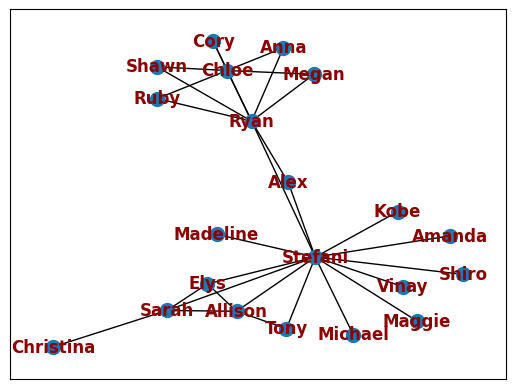

In [224]:
# Basic visualization - when edge properties change, width argument will throw error
nx.draw_networkx(
    g,
    font_color='darkred',
    font_weight='bold',
    node_size=100,
)
plt.show()

### Adjacency matrix

Recall that an *adjacency matrix* is a square matrix of the nodes and the values of the matrix are whether a tie exists (binary, 0/1) or valued (weighted). If the network is undirected, the matrix is symmetric around the diagonal. If the network is directed, the matrix is non-symmetric.


|     | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- | --- |
| **1** | 1 | 1 | 0 | 0 | 1 | 0 | 
| **2** | 1 | 0 | 1 | 0 | 1 | 0 | 
| **3** | 0 | 1 | 0 | 1 | 0 | 0 | 
| **4** | 0 | 0 | 1 | 0 | 1 | 0 | 
| **5** | 1 | 1 | 0 | 1 | 0 | 0 | 
| **6** | 0 | 0 | 0 | 1 | 0 | 0 | 

This data structure is somewhat easier for humans to understand but it encodes a lot of unneeded data with the 0s.

`networkx` can display this data a few functions. Here's our class network:

In [225]:
# Representing with numpy
nx.adjacency_matrix(g).todense()

array([[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [226]:
# Using pandas to get node labels
nx.to_pandas_adjacency(g)

,Stefani,Elys,Sarah,Amanda,Allison,Tony,Christina,Vinay,Kobe,Shiro,Madeline,Maggie,Michael,Ryan,Alex,Chloe,Shawn,Ruby,Cory,Megan,Anna
Stefani,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Elys,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sarah,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amanda,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allison,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tony,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Christina,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vinay,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kobe,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shiro,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adjacency list

An *adjacency list* describes the neighbors of each node.

```
{1:[1,2,5],
 2:[1,3,5],
 3:[2,4],
 4:[3,5,6],
 5:[1,2,4],
 6:[4]
}
```

This data structure is commonly used in a variety of computer and data science settings and is even more information-dense than an edge list, but has performance trade-offs for many common network science metrics.

`networkx` can display this data with the `.adjacency()` method. Here's our class network:

In [227]:
list(g.adjacency())

[('Stefani',
  {'Elys': {'relation': 'Advising', 'years': 1},
   'Sarah': {'relation': 'Advising', 'years': 1},
   'Amanda': {'relation': 'teaching', 'years': 2},
   'Allison': {'relation': 'Advising', 'years': 0},
   'Tony': {'relation': 'teaching', 'years': 3},
   'Vinay': {'relation': 'teaching', 'years': 2},
   'Kobe': {'relation': 'teaching', 'years': 1},
   'Shiro': {'relation': 'teaching', 'years': 1},
   'Madeline': {'relation': 'teaching', 'years': 1},
   'Maggie': {'relation': 'teaching', 'years': 1},
   'Michael': {'relation': 'codingclub', 'years': 2},
   'Ryan': {'relation': 'teaching', 'years': 1},
   'Alex': {'relation': 'teaching', 'years': 1}}),
 ('Elys',
  {'Stefani': {'relation': 'Advising', 'years': 1},
   'Sarah': {'relation': 'friend', 'years': 1},
   'Allison': {'relation': 'labmate', 'years': 0}}),
 ('Sarah',
  {'Stefani': {'relation': 'Advising', 'years': 1},
   'Elys': {'relation': 'friend', 'years': 1},
   'Allison': {'relation': 'labmate', 'years': 0},
   'C

## Reading and writing edgelists

The edgelist representation of the data can be stored in a CSV-style table or as a JSON-style document.

#### Writing data
Use the `to_pandas_edgelist()` function to generate the CSV-style table.

In [228]:
nx.to_pandas_edgelist(g)

,source,target,years,relation
0,Stefani,Elys,1,Advising
1,Stefani,Sarah,1,Advising
2,Stefani,Amanda,2,teaching
3,Stefani,Allison,0,Advising
4,Stefani,Tony,3,teaching
5,Stefani,Vinay,2,teaching
6,Stefani,Kobe,1,teaching
7,Stefani,Shiro,1,teaching
8,Stefani,Madeline,1,teaching
9,Stefani,Maggie,1,teaching


Assign the pandas DataFrame to a variable and you can write it to a .csv with `pandas`'s `.to_csv()` method.

In [229]:
g_pandas_edgelist_df = nx.to_pandas_edgelist(g)
g_pandas_edgelist_df.to_csv('class_edgelist_pandas.csv')

If you want to keep it in the JSON-style document, we can use the `json` library to dump the `g.edges()` data.

In [230]:
g.edges(data=True)

EdgeDataView([('Stefani', 'Elys', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Sarah', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Amanda', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Allison', {'relation': 'Advising', 'years': 0}), ('Stefani', 'Tony', {'relation': 'teaching', 'years': 3}), ('Stefani', 'Vinay', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Kobe', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Shiro', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Madeline', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Maggie', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Michael', {'relation': 'codingclub', 'years': 2}), ('Stefani', 'Ryan', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Alex', {'relation': 'teaching', 'years': 1}), ('Elys', 'Sarah', {'relation': 'friend', 'years': 1}), ('Elys', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Christina', {'rel

Write to disk.

In [231]:
import json

g_json_edgelist = list(g.edges(data=True))

with open('class_edgelist_json.json','w') as f:
    json.dump(g_json_edgelist,f)

If you want to keep it in the JSON-style document, we can use the `json` library to dump the `g.edges()` data.

In [232]:
g.edges(data=True)

EdgeDataView([('Stefani', 'Elys', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Sarah', {'relation': 'Advising', 'years': 1}), ('Stefani', 'Amanda', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Allison', {'relation': 'Advising', 'years': 0}), ('Stefani', 'Tony', {'relation': 'teaching', 'years': 3}), ('Stefani', 'Vinay', {'relation': 'teaching', 'years': 2}), ('Stefani', 'Kobe', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Shiro', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Madeline', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Maggie', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Michael', {'relation': 'codingclub', 'years': 2}), ('Stefani', 'Ryan', {'relation': 'teaching', 'years': 1}), ('Stefani', 'Alex', {'relation': 'teaching', 'years': 1}), ('Elys', 'Sarah', {'relation': 'friend', 'years': 1}), ('Elys', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Allison', {'relation': 'labmate', 'years': 0}), ('Sarah', 'Christina', {'rel

Just like the .csv we create, we can Write to the .json data to disk.

In [233]:
g_json_edgelist = list(g.edges(data=True))

with open('class_edgelist_json.json','w') as f:
    json.dump(g_json_edgelist,f)

## Loading data
If you want to analyze your network data, load the CSV-style edgelist back in and use the `from_pandas_edgelist()` function to turn it into a graph.

In [234]:
read_pandas_edgelist_df = pd.read_csv('class_edgelist_pandas.csv',index_col=0)

# Take a look
read_pandas_edgelist_df.head()

,source,target,years,relation
0,Stefani,Elys,1,Advising
1,Stefani,Sarah,1,Advising
2,Stefani,Amanda,2,teaching
3,Stefani,Allison,0,Advising
4,Stefani,Tony,3,teaching


In [235]:
# Convert to a graph
read_pandas_edgelist_g = nx.from_pandas_edgelist(read_pandas_edgelist_df,edge_attr=True)

# Look at the graph data
read_pandas_edgelist_g.edges(data=True)

EdgeDataView([('Stefani', 'Elys', {'years': 1, 'relation': 'Advising'}), ('Stefani', 'Sarah', {'years': 1, 'relation': 'Advising'}), ('Stefani', 'Amanda', {'years': 2, 'relation': 'teaching'}), ('Stefani', 'Allison', {'years': 0, 'relation': 'Advising'}), ('Stefani', 'Tony', {'years': 3, 'relation': 'teaching'}), ('Stefani', 'Vinay', {'years': 2, 'relation': 'teaching'}), ('Stefani', 'Kobe', {'years': 1, 'relation': 'teaching'}), ('Stefani', 'Shiro', {'years': 1, 'relation': 'teaching'}), ('Stefani', 'Madeline', {'years': 1, 'relation': 'teaching'}), ('Stefani', 'Maggie', {'years': 1, 'relation': 'teaching'}), ('Stefani', 'Michael', {'years': 2, 'relation': 'codingclub'}), ('Stefani', 'Ryan', {'years': 1, 'relation': 'teaching'}), ('Stefani', 'Alex', {'years': 1, 'relation': 'teaching'}), ('Elys', 'Sarah', {'years': 1, 'relation': 'friend'}), ('Elys', 'Allison', {'years': 0, 'relation': 'labmate'}), ('Sarah', 'Allison', {'years': 0, 'relation': 'labmate'}), ('Sarah', 'Christina', {'yea

Load the JSON-style edgelist back in and use t

In [236]:
with open('class_edgelist_json.json','r') as f:
    read_json_edgelist = json.load(f)

# Take a look
read_json_edgelist

[['Stefani', 'Elys', {'relation': 'Advising', 'years': 1}],
 ['Stefani', 'Sarah', {'relation': 'Advising', 'years': 1}],
 ['Stefani', 'Amanda', {'relation': 'teaching', 'years': 2}],
 ['Stefani', 'Allison', {'relation': 'Advising', 'years': 0}],
 ['Stefani', 'Tony', {'relation': 'teaching', 'years': 3}],
 ['Stefani', 'Vinay', {'relation': 'teaching', 'years': 2}],
 ['Stefani', 'Kobe', {'relation': 'teaching', 'years': 1}],
 ['Stefani', 'Shiro', {'relation': 'teaching', 'years': 1}],
 ['Stefani', 'Madeline', {'relation': 'teaching', 'years': 1}],
 ['Stefani', 'Maggie', {'relation': 'teaching', 'years': 1}],
 ['Stefani', 'Michael', {'relation': 'codingclub', 'years': 2}],
 ['Stefani', 'Ryan', {'relation': 'teaching', 'years': 1}],
 ['Stefani', 'Alex', {'relation': 'teaching', 'years': 1}],
 ['Elys', 'Sarah', {'relation': 'friend', 'years': 1}],
 ['Elys', 'Allison', {'relation': 'labmate', 'years': 0}],
 ['Sarah', 'Allison', {'relation': 'labmate', 'years': 0}],
 ['Sarah', 'Christina', {'

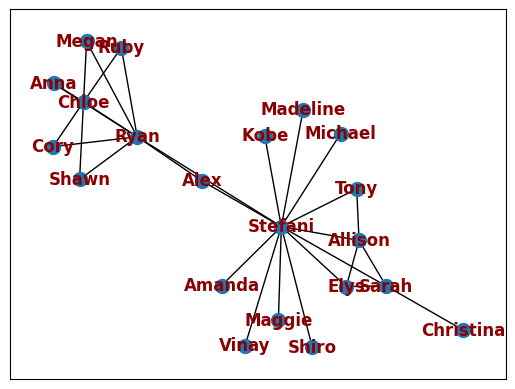

In [237]:
# Make an empty graph
read_json_edgelist_g = nx.Graph()

# Add all the edges from read_json_edgelist to the empty graph
read_json_edgelist_g.add_edges_from(read_json_edgelist)

# Inspect the graph
read_json_edgelist_g.edges(data=True)

# Basic visualization - when edge properties change, width argument will throw error
nx.draw_networkx(
    read_json_edgelist_g,
    font_color='darkred',
    font_weight='bold',
    node_size=100,
)
plt.show()

### Reading and writing adjacency matrices

Like we saw with th edgelist, we can use the `to_pandas_adjacency` function to generate the DataFrame and write it to a CSV.

In [238]:
g_pandas_adjacency_df = nx.to_pandas_adjacency(g)

g_pandas_adjacency_df

,Stefani,Elys,Sarah,Amanda,Allison,Tony,Christina,Vinay,Kobe,Shiro,Madeline,Maggie,Michael,Ryan,Alex,Chloe,Shawn,Ruby,Cory,Megan,Anna
Stefani,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Elys,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sarah,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amanda,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allison,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tony,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Christina,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vinay,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kobe,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shiro,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
g_pandas_adjacency_df.to_csv('class_adjacency_pandas.csv')

Now we can read an adjacency matrix into Python and convert to a graph.

In [240]:
read_pandas_edgelist_df = pd.read_csv('class_adjacency_pandas.csv',index_col=0)

read_pandas_edgelist_df.head()

,Stefani,Elys,Sarah,Amanda,Allison,Tony,Christina,Vinay,Kobe,Shiro,Madeline,Maggie,Michael,Ryan,Alex,Chloe,Shawn,Ruby,Cory,Megan,Anna
Stefani,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Elys,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sarah,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amanda,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allison,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
read_pandas_edgelist_g = nx.from_pandas_adjacency(read_pandas_edgelist_df)

read_pandas_edgelist_g.edges(data=True)

EdgeDataView([('Stefani', 'Elys', {'weight': 1.0}), ('Stefani', 'Sarah', {'weight': 1.0}), ('Stefani', 'Amanda', {'weight': 1.0}), ('Stefani', 'Allison', {'weight': 1.0}), ('Stefani', 'Tony', {'weight': 1.0}), ('Stefani', 'Vinay', {'weight': 1.0}), ('Stefani', 'Kobe', {'weight': 1.0}), ('Stefani', 'Shiro', {'weight': 1.0}), ('Stefani', 'Madeline', {'weight': 1.0}), ('Stefani', 'Maggie', {'weight': 1.0}), ('Stefani', 'Michael', {'weight': 1.0}), ('Stefani', 'Ryan', {'weight': 1.0}), ('Stefani', 'Alex', {'weight': 1.0}), ('Elys', 'Sarah', {'weight': 1.0}), ('Elys', 'Allison', {'weight': 1.0}), ('Sarah', 'Allison', {'weight': 1.0}), ('Sarah', 'Christina', {'weight': 1.0}), ('Allison', 'Tony', {'weight': 1.0}), ('Ryan', 'Alex', {'weight': 1.0}), ('Ryan', 'Chloe', {'weight': 1.0}), ('Ryan', 'Shawn', {'weight': 1.0}), ('Ryan', 'Ruby', {'weight': 1.0}), ('Ryan', 'Cory', {'weight': 1.0}), ('Ryan', 'Megan', {'weight': 1.0}), ('Ryan', 'Anna', {'weight': 1.0}), ('Chloe', 'Shawn', {'weight': 1.0})

# <span style="color:red">Pizza exercise</span>
Load the pizza dataset from canvas. This is a dataset of Reddit users that represents requests made on a thread called _Random Acts of Pizza_ or _ROAP_, and is part of a larger dataset used for research (see [Althoff, Danescu-Niculescu-Mizil, and Jurafsky (2014)](https://arxiv.org/pdf/1405.3282.pdf)). The requester column denotes users who made requests for pizza and the responder column denotes users who read the request and responded to the request by giving pizza. Other columns represent the request ID and data on the requester at the time the request was made.

Use an appropriate `networkx` function to read in the pizza data and assign it to the variable `pizza_g`. Hint: use the `requester` and `responder` columns to start.

In [242]:
pizza_edgelist_df = pd.read_csv('pizza.csv')

pizza_edgelist_df

,requester,responder,request_id,requester_votes,requester_subreddits
0,tapedeckghost,ded_reckoning,t3_zpzly,179,15
1,photography444,iamseth,t3_1g2xtg,23,2
2,FramingHips,pookie85,t3_vtgdh,2037,13
3,WishIWereHere,donitsu,t3_oa1bn,158,3
4,tealie13,kaboose666,t3_wvu7d,740,14
...,...,...,...,...,...
395,Eaeelil,tanyagal2,t3_ubnwm,3965,75
396,DietPepsi20oz,caladanbrood23,t3_jxj0w,0,0
397,YepImBroke,thumpingarnt,t3_ihhbr,0,0
398,Kappn,in2itiveact,t3_m7m7l,10,2


In [243]:
pizza_edgelist_df.shape

(400, 5)

In [244]:
# Convert to a graph
pizza_g = nx.from_pandas_edgelist(pizza_edgelist_df, edge_attr=True,
                                  source='requester', target='responder')

# Look at the graph data
pizza_g.edges(data=True)

EdgeDataView([('tapedeckghost', 'ded_reckoning', {'request_id': 't3_zpzly', 'requester_votes': 179, 'requester_subreddits': 15}), ('photography444', 'iamseth', {'request_id': 't3_1g2xtg', 'requester_votes': 23, 'requester_subreddits': 2}), ('FramingHips', 'pookie85', {'request_id': 't3_vtgdh', 'requester_votes': 2037, 'requester_subreddits': 13}), ('WishIWereHere', 'donitsu', {'request_id': 't3_oa1bn', 'requester_votes': 158, 'requester_subreddits': 3}), ('tealie13', 'kaboose666', {'request_id': 't3_wvu7d', 'requester_votes': 740, 'requester_subreddits': 14}), ('Renegade_Journo', 'raspberryseltzer', {'request_id': 't3_lpwg8', 'requester_votes': 18555, 'requester_subreddits': 23}), ('PaperCrates', 'mmmcandy', {'request_id': 't3_wzdfb', 'requester_votes': 194, 'requester_subreddits': 14}), ('mmmcandy', 'christbeatty', {'request_id': 't3_wogdg', 'requester_votes': 2768, 'requester_subreddits': 24}), ('mmmcandy', 'coldsandovercoats', {'request_id': 't3_wkd6l', 'requester_votes': 6407, 'req

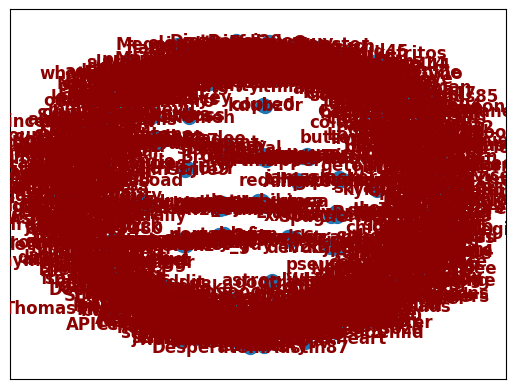

In [245]:
# Basic visualization - when edge properties change, width argument will throw error
nx.draw_networkx(
    pizza_g,
    font_color='darkred',
    font_weight='bold',
    node_size=100,
)
plt.show()

# Gross

Use the information contained in the graph object `pizza_g` to determine how many pizza requests were fulfilled.  

There were 400 pizza requests that were fulfilled.

In [246]:
# Count the number of edges in the network
pizza_g.number_of_edges()

400

Using an appropriate `networkx` method, add the other columns in the pizza dataset as edge properties.  

I used the edge_attr=True in the creation of the graph so the other columns are already present.

In [247]:
pizza_g.edges(data=True)

EdgeDataView([('tapedeckghost', 'ded_reckoning', {'request_id': 't3_zpzly', 'requester_votes': 179, 'requester_subreddits': 15}), ('photography444', 'iamseth', {'request_id': 't3_1g2xtg', 'requester_votes': 23, 'requester_subreddits': 2}), ('FramingHips', 'pookie85', {'request_id': 't3_vtgdh', 'requester_votes': 2037, 'requester_subreddits': 13}), ('WishIWereHere', 'donitsu', {'request_id': 't3_oa1bn', 'requester_votes': 158, 'requester_subreddits': 3}), ('tealie13', 'kaboose666', {'request_id': 't3_wvu7d', 'requester_votes': 740, 'requester_subreddits': 14}), ('Renegade_Journo', 'raspberryseltzer', {'request_id': 't3_lpwg8', 'requester_votes': 18555, 'requester_subreddits': 23}), ('PaperCrates', 'mmmcandy', {'request_id': 't3_wzdfb', 'requester_votes': 194, 'requester_subreddits': 14}), ('mmmcandy', 'christbeatty', {'request_id': 't3_wogdg', 'requester_votes': 2768, 'requester_subreddits': 24}), ('mmmcandy', 'coldsandovercoats', {'request_id': 't3_wkd6l', 'requester_votes': 6407, 'req

Use an appropriate `networkx` function to display this graph as different data structures (edgelist, adjacency matrix, adjacency list).

In [248]:
# Using pandas to get node labels
nx.to_pandas_adjacency(pizza_g)

,tapedeckghost,ded_reckoning,photography444,iamseth,FramingHips,pookie85,WishIWereHere,donitsu,tealie13,kaboose666,Renegade_Journo,raspberryseltzer,PaperCrates,mmmcandy,MaltMix,minivansareevil,Safria,botw,senior2012,sartim,zimpirate,kigood,xxrocksteadyxx,dezmodez,Devron_System,m2nu,devonjackson,in2itiveact,bobmystery,0mggames,Hekain,z0bie,BrilliantBen,wingsalone,PorcelainPoet,leftnewdigg,demon8rix,mr_jeep,xyz66,incoherentrant,MidNightSky,loki-laufeyson,Kozii,overripebanana,yawnlikeyoumeanit,clarle,LiterallyProbably,pandapat,bridgetonarnia,nerdalicious85,...,iamtheharpy,St0len,msm1ssy,damustardtiger,justinfrederick,straha21,Spagherica,Trebloc,coldsandovercoats,amarkson,homelessgal,mcallanan,zer0hz,Bensteez,trust_me_im_a_panda,elspazzz,toafka,MentlegenBacon,iheartoptimusprime,tynosaur,thewaterballoonist,nelliebean,gracebatmonkey,dyslexicpea,LoneKharnivore,roxieh,Sinnocent,fobbingmobius,swilltastic,isothien,SugarRushSlt,nissie1,illgiveyouthekey,Howulikeit,horny_toad2006,adorhlb23,2phresh,iheartreddit420,hogfathom,TommyTenToes,heartagram_ben,bubblegumgills,Eaeelil,DietPepsi20oz,caladanbrood23,YepImBroke,thumpingarnt,Kappn,AccioNeedles,crakhed
tapedeckghost,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ded_reckoning,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
photography444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iamseth,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FramingHips,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YepImBroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
list(pizza_g.adjacency())

Use an appropriate `networkx` function to write this graph to a different file format than you used previously.

In [250]:
pizza_g_json_edgelist = list(pizza_g.edges(data=True))

with open('pizza_edgelist_json.json','w') as f:
    json.dump(pizza_g_json_edgelist,f)

# Lesson 2

In [251]:
# Whoops should have been directed.

pizza_d_g = nx.from_pandas_edgelist(df= pizza_edgelist_df,edge_attr=True, source='requester',
                                    target='responder', create_using=nx.DiGraph())

In [252]:
print(nx.is_directed(pizza_d_g))
print(nx.is_weighted(pizza_d_g))

True
False


### Degree of Centrality  
Compute the degree centrality on your pizza graph. You can choose in or out-degree (or do both if feeling ambitious). Sort the values to find the nodes with the top (in/out) degree centrality.  

Explain in your own words your results.

Pastafarianwit received the most amount of RAOP acts so it makes sense that he is the highest in the centrality measure. This network mostly consists of 1 to 1 connections. 

In [253]:
pizza_sorted = sorted(pizza_d_g.degree, key=lambda x: x[1], reverse=True)
pizza_degs = pd.Series(pizza_sorted)
pizza_degs.head()

0    (pastafariantwit, 7)
1               (m2nu, 6)
2       (johngalt1337, 6)
3         (jetboyterp, 6)
4            (mr_jeep, 5)
dtype: object

In [254]:
pizza_sorted2 = sorted(pizza_d_g.in_degree, key=lambda x: x[1], reverse=True)
pizza_degs2 = pd.Series(pizza_sorted2)
pizza_degs2.head()

0    (pastafariantwit, 7)
1               (m2nu, 6)
2       (johngalt1337, 6)
3         (jetboyterp, 6)
4            (mr_jeep, 5)
dtype: object

In [255]:
pizza_sorted3 = sorted(pizza_d_g.out_degree, key=lambda x: x[1], reverse=True)
pizza_degs3 = pd.Series(pizza_sorted3)
pizza_degs3.head()

0     (tapedeckghost, 1)
1    (photography444, 1)
2       (FramingHips, 1)
3     (WishIWereHere, 1)
4          (tealie13, 1)
dtype: object

### Closeness Centrality  
Compute the closeness centrality on your pizza graph. Sort the values to find the nodes with the top closeness centrality.  

Explain in your own words your results.

Pastafarianwit received the most amount of RAOP acts so it makes sense that he is the highest in the centrality measure. This network mostly consists of 1 to 1 connections. 

In [256]:
pizza_cc = nx.centrality.closeness_centrality(pizza_d_g)
list(pizza_cc.items())[:5]

# clean it up to get sorted top 5
pd.Series(pizza_cc).sort_values(ascending=False).head(5)

pastafariantwit    0.009642
m2nu               0.008264
johngalt1337       0.008264
jetboyterp         0.008264
thr                0.006887
dtype: float64

### Betweeness Centrality  
Compute the betweenness centrality on your pizza graph. Sort the values to find the nodes with the top betweenness centrality.  

Explain in your own words your results.  

From these results we can see that this network contains mostly independent posters. This really puts the emphasis on the random part of the RAOP subreddit.

In [257]:
pizza_bc = nx.centrality.betweenness_centrality(pizza_d_g)
list(pizza_bc.items())[:5]

# clean it up to get sorted top 5
pd.Series(pizza_bc).sort_values(ascending=False).head(5)

kimi21               0.000002
duckydoom            0.000002
ithinkimdoingthis    0.000002
chalt0               0.000002
tapedeckghost        0.000000
dtype: float64

### Eigenvector Centrality  
Compute the eigenvector centrality on your pizza graph. Sort the values to find the nodes with the top eigenvector centrality.  

Explain in your own words your results.

These can be thought of like "influencers" in the network. They are connected to other nodes that themselves are well connected.

In [259]:
pizza_ec = nx.centrality.eigenvector_centrality(pizza_d_g, max_iter=1000)
list(pizza_ec.items())[:5]

# clean it up to get sorted top 5
pd.Series(pizza_ec).sort_values(ascending=False).head(5)

jeremybeadle       0.499693
amarkson           0.499693
iamaslacker246     0.499693
thegeorge          0.499693
pastafariantwit    0.009430
dtype: float64

### Visualization  
Create one visualization of your graph using the techniques we discussed in class.  

This graph is horrible looking but the circular nature of it and keeping in mind there are only 400 edges reinforces how independent all these users are. That fact that RAOP is truly very random warms my heart.

(-1.1574898576736452,
 1.2049715137481691,
 -1.205790500342846,
 1.165700714290142)

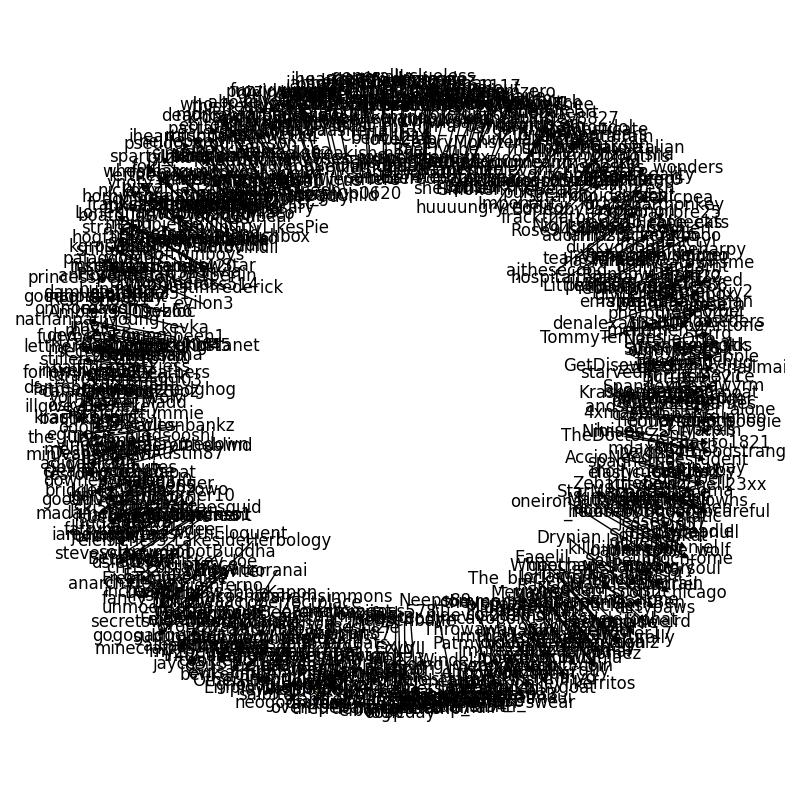

In [261]:
np.random.seed(123)
pos = nx.spring_layout(pizza_d_g)
betCent = nx.betweenness_centrality(pizza_d_g, normalized=True, endpoints=True)
node_color = [20000.0 * pizza_d_g.degree(v) for v in pizza_d_g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(pizza_d_g, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

**Submit the W8L1 class task and the W8L2 class task together. Submit by uploading your .ipynb file and .html (File > Export Notebook As… > HTML) output to Canvas when you are done. 